In [1]:
!pip install pymorphy2
!pip install pymorphy2-dicts
!pip install DAWG-Python
!pip install nltk
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 42.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=bf7373d810badb8d44c59dd234821b6652940600f4dc948ea17738069cf7637a
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 4.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import word_tokenize
from string import punctuation
from tqdm import tqdm
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
!git clone https://github.com/nadiaroschina/native-advertising-detection.git

Cloning into 'native-advertising-detection'...
remote: Enumerating objects: 2601, done.
remote: Counting objects: 100% (615/615), done.
remote: Compressing objects: 100% (582/582), done.
remote: Total 2601 (delta 36), reused 612 (delta 33), pack-reused 1986
Receiving objects: 100% (2601/2601), 148.17 MiB | 21.17 MiB/s, done.
Resolving deltas: 100% (159/159), done.
Updating files: 100% (2081/2081), done.


In [5]:
final_data = pd.read_csv("/content/native-advertising-detection/final_dataset.csv")

In [6]:
generated_ads = final_data[final_data.url == "Nadia"]

In [7]:
generated_ads_news = final_data[final_data.url == "Игорь"]

In [8]:
!unzip /content/native-advertising-detection/data/meduza_dataset_big.csv.zip

Archive:  /content/native-advertising-detection/data/meduza_dataset_big.csv.zip
  inflating: meduza_dataset_big.csv  


In [9]:
meduza_data = pd.read_csv("/content/meduza_dataset_big.csv")

In [10]:
meduza_ads = meduza_data[meduza_data.tag == "партнерский материал"]

In [11]:
meduza_actual_news = meduza_data[meduza_data.tag != "партнерский материал"]

In [12]:
lenta_actual_news = final_data[(final_data.url != "Nadia") & (final_data.url != "Игорь")]

In [13]:
pymorphy2_analyzer = MorphAnalyzer()

In [14]:
stop_words = set(stopwords.words('russian'))

def build_word_cloud(df):
    sample_size = 1000
    all_words = []

    for item in tqdm(df.sample(sample_size, replace=True)["text"].values):
        s = word_tokenize(item)
        for w in s:
            if w not in punctuation:
                all_words += [pymorphy2_analyzer.parse(w)[0].normal_form]

    print(len(all_words) / sample_size)
    wc = WordCloud().generate(' '.join([w for w in all_words if w not in stop_words]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

100%|██████████| 1000/1000 [00:29<00:00, 34.17it/s]


98.412


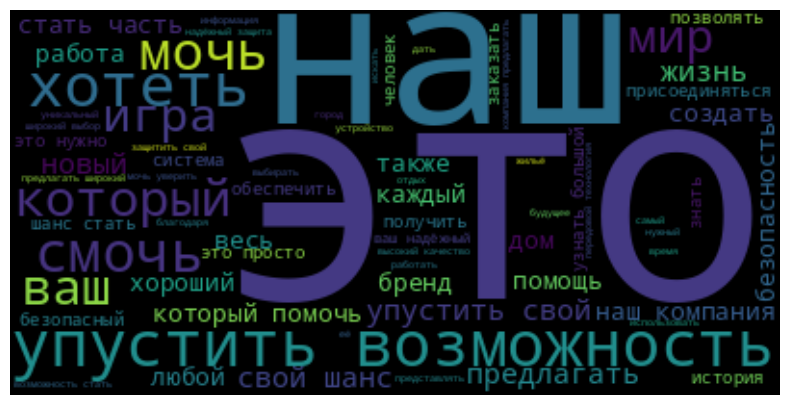

In [15]:
build_word_cloud(generated_ads)

100%|██████████| 1000/1000 [00:46<00:00, 21.37it/s]


151.32


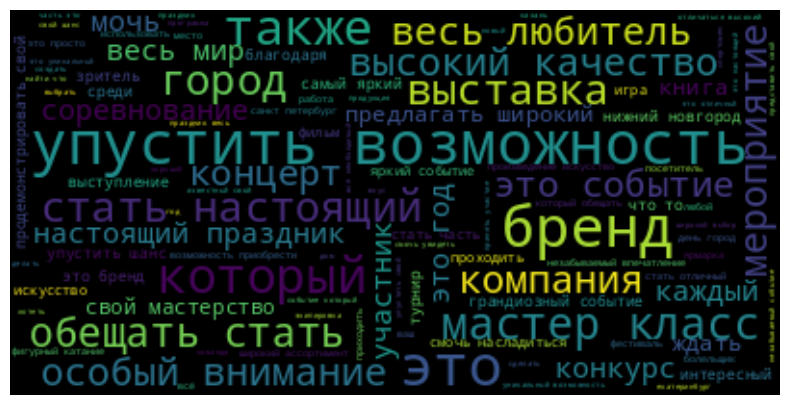

In [16]:
build_word_cloud(generated_ads_news)

100%|██████████| 1000/1000 [01:27<00:00, 11.49it/s]


268.695


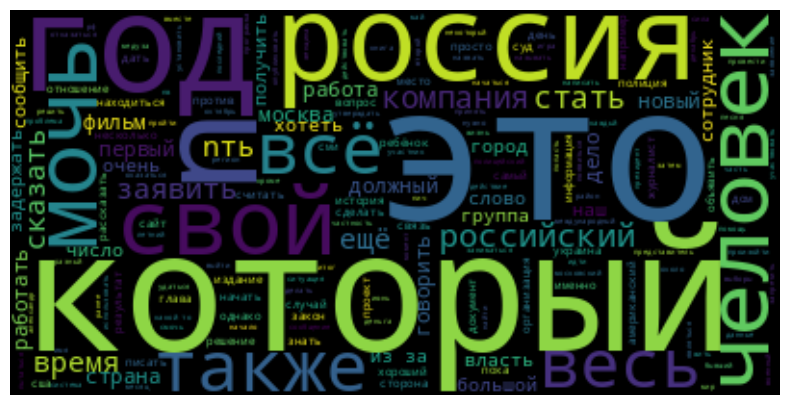

In [17]:
build_word_cloud(meduza_actual_news)

100%|██████████| 1000/1000 [04:09<00:00,  4.00it/s]


813.005


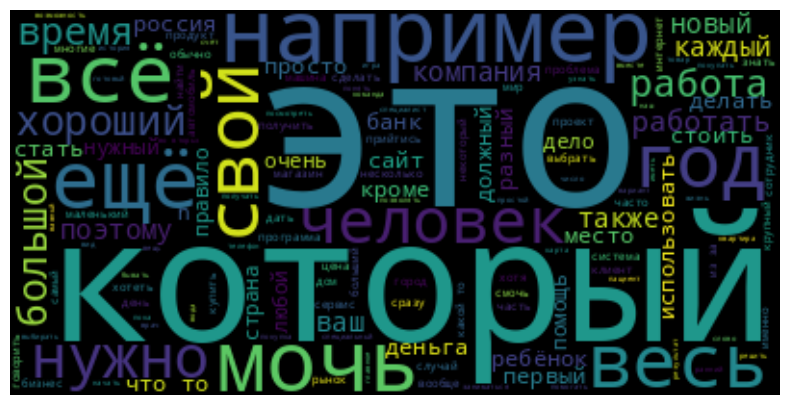

In [18]:
build_word_cloud(meduza_ads)

100%|██████████| 1000/1000 [00:58<00:00, 17.17it/s]


185.568


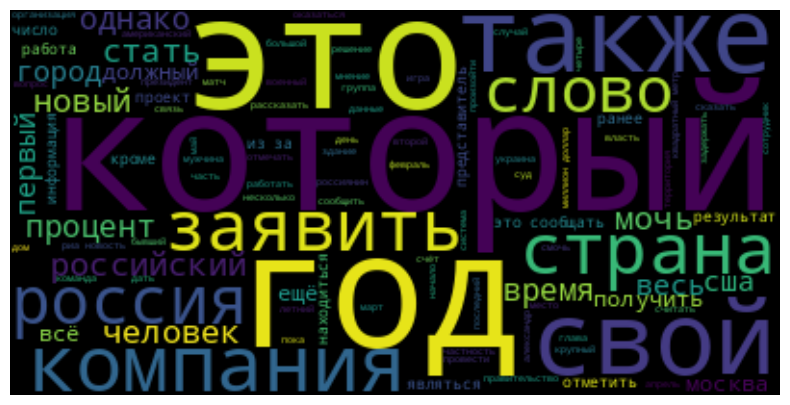

In [19]:
build_word_cloud(lenta_actual_news)